## Group Assignment Week 8

In [52]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.optimize

#### Problem 1

In [53]:
# Define the data
year = np.arange(1994,2010,1)
year_norm = year - year.mean() 
ppm = np.array([356.8,358.2,360.3,361.8,364.0,365.7,366.7,368.2,370.5,372.2,374.9,376.7,378.7,381.0,382.9,384.7])

In [54]:
# Define the linear fitting function
def lineFit(x, y):
    xavg = x.mean()
    slope = (y * (x-xavg)).sum()/(x * (x-xavg)).sum()
    yint = y.mean() - slope*xavg
    return slope, yint, xavg

In [55]:
a, b, c =lineFit(year_norm,ppm)
print(f'a = {a}\nb = {b}')

a = 1.872205882352939
b = 370.20624999999995


<font size = 3 color = black face = "Times New Roman">The average increase of the concentration per year is 1.872205882352939 

#### Problem 2

<font size = 3 color = black face = "Times New Roman">We can think this problem as $f(x) = a_0f_0(x)+a_1f_1(x)$

In [56]:
# Define the data.
x = np.array([-0.5,-0.19,0.02,0.20,0.35,0.50])
y = np.array([-3.558,-2.874,-1.995,-1.040,-0.068,0.677])
f_0 = np.sin(math.pi * x / 2 )
f_1 = np.cos(math.pi * x / 2 )

#### Normal equation method.

In [57]:
# Defin two matrixs.
A = np.array([[(f_0 * f_0).sum(), (f_0 * f_1).sum()],[(f_0 * f_1).sum(), (f_1 * f_1).sum()]])
b_matrix = np.array([(f_0 * y).sum(), (f_1 * y).sum()])

In [58]:
a_matrix =  np.dot(np.linalg.inv(A),b)
print(f'a = {a_matrix[0]}\nb = {a_matrix[1]}')

a = [263.83782136 -28.43591508]
b = [-28.43591508  84.53518306]


#### QR method.

In [59]:
# Define two matrices.
A = np.zeros((6,2))
for i in range (6):
    A[i][0] = f_0[i]
    A[i][1] = f_1[i]
b_matrix = y.copy()

In [60]:
q,r = np.linalg.qr(A)
p = np.dot(q.T , b_matrix)
a_matrix = np.dot(np.linalg.inv(r),p)
print(f'a = {a_matrix[0]}\nb = {a_matrix[1]}')

a = 3.038490530950666
b = -2.0495596632192274


<font size = 3 color = black face = "Times New Roman">We can see that the results of these two methods are almost exactly the same, with only a small error, so these two methods can solve the problem well and get a good result.

#### Problem 3

#### Question 1

$f(x,y)= a + bx + cy$

<font size = 3 color = black face = "Times New Roman">Then the minimizing $S$ yields is:
$$
S = \sum[z_i - (a + bx_i+cy_i)]^2\\
\frac{\partial S}{\partial a}= - 2 \sum[z_i - (a + bx_i+cy_i)] = 0\\
\frac{\partial S}{\partial b}= - 2 \sum[z_i - (a + bx_i+cy_i)] x_i = 0\\
\frac{\partial S}{\partial c}= - 2 \sum[z_i - (a + bx_i+cy_i)] y_i= 0
$$
<font size = 3 color = black face = "Times New Roman">Hence we are easy to know that
$$
\begin{pmatrix}
n && \sum x_i && \sum y_i\\
\sum x_i && \sum x_i^2 && \sum x_i y_i\\
\sum y_i && \sum x_i y_i && \sum y_i^2\\
\end{pmatrix}
\begin{pmatrix}
a\\
b\\
c\\
\end{pmatrix}
=
\begin{pmatrix}
\sum z_i\\
\sum x_i z_i\\
\sum y_i z_i\\
\end{pmatrix}
$$

#### Question 2


In [61]:
# Define the data
x = np.array([0,0,1,2,2,2])
y = np.array([0,1,0,0,1,2])
z = np.array([1.42,1.85,0.78,0.18,0.60,1.05])

In [62]:
# Define matrix A.
A = np.zeros((3,3))
A[0][0] = len(x)
A[1][1] = (x**2).sum()
A[2][2] = (y**2).sum()
A[0][1] = A[1][0] = x.sum()
A[0][2] = A[2][0] = y.sum()
A[1][2] = A[2][1] = (x*y).sum()

In [63]:
# Define matrix b
b_matrix = np.array([z.sum(), (x*z).sum(), (y*z).sum()])

In [64]:
a_matrix = np.dot(np.linalg.inv(A),b_matrix)
print(f'a = {a_matrix[0]}\nb = {a_matrix[0]}\nc = {a_matrix[1]}')

a = 1.4132558139534885
b = 1.4132558139534885
c = -0.6213953488372095


<font size = 3 color = black face = "Times New Roman">Hence we have determined a,b,c.

### Problem 4

#### Question 1

In [65]:
t, d, error = np.loadtxt("absorption_spectrum.txt", skiprows=4,unpack=True)
print(t)
print(d)
print(error)

[ 0.2  1.4  2.7  3.9  5.1  6.4  7.6  8.8 10.1 11.3 12.5 13.8 15.  16.2
 17.5 18.7 19.9 21.1 22.4 23.6 24.8 26.1 27.3 28.5 29.8 31.  32.2 33.5
 34.7 35.9 37.2 38.4]
[41.1 37.2 28.3 24.8 27.8 34.5 39.  37.7 29.8 22.2 22.3 26.7 30.4 32.6
 28.9 22.9 21.7 22.1 22.3 26.3 26.2 21.4 20.  20.1 21.2 22.  21.6 21.
 19.7 17.9 18.1  8.9]
[0.9 0.9 0.9 1.1 0.8 0.7 0.9 0.8 0.9 0.7 0.6 1.1 0.7 0.8 0.8 1.3 0.9 1.
 1.  1.  0.8 0.9 1.  1.2 0.5 0.9 0.7 0.7 0.9 0.9 0.8 1.1]


In [66]:
def oscDecay(x, A, B, C, tau, omega):
    return A * (1 + B * np.cos(omega * x)) * np.exp(-x**2/(2*tau**2)) + C

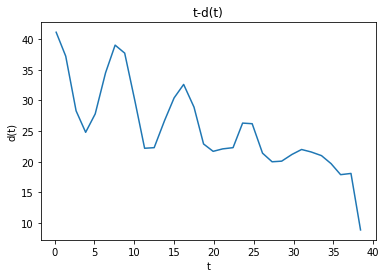

In [67]:
plt.plot(t, d)
plt.xlabel('t')
plt.ylabel('d(t)')
plt.title('t-d(t)')
plt.show()

<font size = 3 color = black face = "Times New Roman">We know that $\omega$ controls the period of the picture, and from the data we find that the interval between valleys are $7.4s$, $8.6s$, $7.4s$ and $8.6s$. We choose to use the average $8s$ as the period, so $\omega$ $=$ ${2\pi} \over {8}$. 

<font size = 3 color = black face = "Times New Roman">We just want to get an initial value, so there is no need to calculate extremely precisely.   
So for $\tau$, I choose to use just three data (3.9, 24.8), (11.3, 22.2) and (19.9, 21.7) to calculate it approximately. They are all in the valley, so we assume:  
$24.8 = $ $ A(1-B)e^{{-3.9^2}\over{2\tau^2}} + C$  
$22.2 = $ $ A(1-B)e^{{-11.3^2}\over{2\tau^2}} + C$  
$21.7 = $ $ A(1-B)e^{{-19.9^2}\over{2\tau^2}} + C$  
Then we can get:  
$2.6 = $ $ A(1-B)(e^{{-3.9^2}\over{2\tau^2}} - e^{{-11.3^2}\over{2\tau^2}})$  
$0.5 = $ $ A(1-B)(e^{{-11.3^2}\over{2\tau^2}} - e^{{-19.9^2}\over{2\tau^2}})$  
Using Taylar expansion we can get an approximate solution:  
$\tau = $ $1\over2$ $\sqrt{{3.9^4 - 11.3^4 - 5.2\times11.3^4 + 5.2\times19.9^4}\over{3.9^2 - 11.3^2 - 5.2\times11.3^2 + 5.2\times19.9^2}}$  
Here I just use the first three term. But don't worry, the results later prove this is viable.

<font size = 3 color = black face = "Times New Roman">Then, we want to get $A$, $B$ and $C$. This is much easier.  
$d_1 = $ $A(1-B)e^{{-t_1^2}\over{2\tau^2}} + C$  
$d_2 = $ $A(1-B)e^{{-t_2^2}\over{2\tau^2}} + C$  
$d_3 = $ $A(1+B)e^{{-t_3^2}\over{2\tau^2}} + C$   
$d_4 = $ $A(1+B)e^{{-t_4^2}\over{2\tau^2}} + C$  
let  
$a_1 = $ ${d_2 - d_1}\over{e^{{-t_2^2}\over{2\tau^2}} - e^{{-t_1^2}\over{2\tau^2}}} $$= A(1-B)$  
$a_2 = $ ${d_4 - d_3}\over{e^{{-t_4^2}\over{2\tau^2}} - e^{{-t_3^2}\over{2\tau^2}}} $$= A(1+B)$  
$A = $${a_1 + a_2}\over{2}$
$B = $${a_2 - a_1}\over{a_1 + a_2}$  
Then we can get C by plugging A and B into a random data.

In [68]:
omega0 = 2*np.pi / 8
tau0 = 1/2*np.sqrt((3.9**4-11.3**4-5.2*11.3**4+5.2*19.9**4)/(3.9**2-11.3**2-5.2*11.3**2+5.2*19.9**2))
a1 = (22.2 - 21.7) / (math.exp(-11.3**2 / (2*tau0**2)) - math.exp(-19.9**2 / (2*tau0**2)))
a2 = (39 - 32.6) / (math.exp(-7.6**2 / (2*tau0**2)) - math.exp(-16.2**2 / (2*tau0**2)))
A0 = (a1 + a2) / 2
B0 = (a2 - a1) / (a1 + a2)
C0 = 24.8 - A0 * (1 - B0) * math.exp(-3.9**2 / (2*tau0**2))
print(f'{chr(969)} = {omega0}')
print(f'{chr(964)} = {tau0}')
print(f'A = {A0}')
print(f'B = {B0}')
print(f'C = {C0}')

ω = 0.7853981633974483
τ = 11.80137890636517
A = 8.2053617324868
B = 0.8441468698999549
C = 23.5891271559341


<font size = 3 color = black face = "Times New Roman">The calculations of $A, B$ and $C$ are based on $\tau$, so the error of $\tau$ may caused larger error of $A, B$ and $C$. 

#### Question 2

<font size = 3 color = black face = "Times New Roman">Now we use the inner function scipy.optimize.curve_fit( ) and the initial value we have calculated in $(1)$ to get the best fit.

In [69]:
nlfit, nlpcov = scipy.optimize.curve_fit(oscDecay,t, d, p0=[A0, B0, C0, tau0, omega0],sigma=error)
A, B, C, tau, omega = nlfit
d_fit = oscDecay(t, A, B, C, tau, omega)
print(A, B, C, tau, omega)

15.833097444908818 0.5499776960682443 16.9385221247744 17.330476676899096 0.7792678284536328


<font size = 3 color = black face = "Times New Roman">We get the best value $A = 15.833$, $B = 0.555$, $C = 16.94$, $\tau = 17.33$ and $\omega = 0.78$.

In [70]:
def chi_square(t, d, d_fit, error):
    resids = d - d_fit
    chisqr = ((resids / error) ** 2).sum() / float(len(d_fit) - 5)
    return chisqr
chisqr = chi_square(t, d, d_fit, error)
print(chisqr)

4.0825472062998855


<font size = 3 color = black face = "Times New Roman">The chi-square of this fitting line is $\chi^2 = 4.08$.

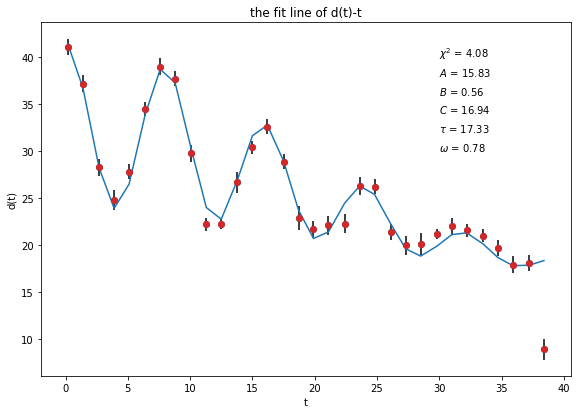

In [71]:
fig = plt.figure(1, figsize=(9.5, 6.5))
plt.plot(t, d_fit)
plt.scatter(t,d)
plt.errorbar(t, d, yerr=error, fmt='oC3', ecolor='black')
plt.xlabel('t')
plt.ylabel('d(t)')
plt.title('the fit line of d(t)-t')
plt.text(30, 40, "$\chi^2$ = 4.08", size = 10, alpha = 1)
plt.text(30, 38, "$A$ = 15.83", size = 10, alpha = 1)
plt.text(30, 36, "$B$ = 0.56", size = 10, alpha = 1)
plt.text(30, 34, "$C$ = 16.94", size = 10, alpha = 1)
plt.text(30, 32, r"$\tau$ = 17.33", size = 10, alpha = 1)
plt.text(30, 30, "$\omega$ = 0.78", size = 10, alpha = 1)
plt.show()

#### Question 3

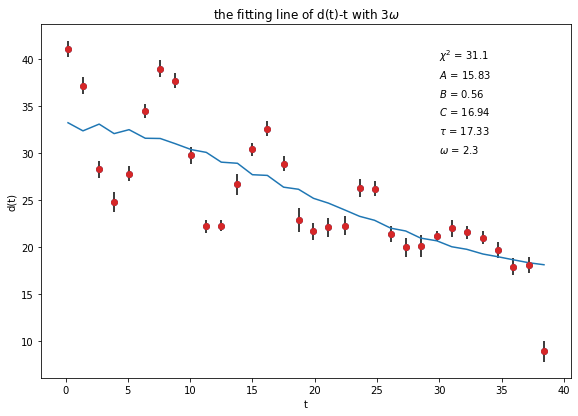

16.416578295862628 0.026257923929753475 16.44403603376333 17.928831362246203 2.3141870059305294
31.114160318645524


In [72]:
nlfit2, nlpcov2 = scipy.optimize.curve_fit(oscDecay,t, d, p0=[A, B, C, tau, omega*3],sigma=error)
A2, B2, C2, tau2, omega2 = nlfit2
d_fit2 = oscDecay(t, A2, B2, C2, tau2, omega2)
chisqr2 = chi_square(t, d, d_fit2, error)
fig = plt.figure(1, figsize=(9.5, 6.5))
plt.plot(t, d_fit2)
plt.scatter(t,d)
plt.errorbar(t, d, yerr=error, fmt='oC3', ecolor='black')
plt.xlabel('t')
plt.ylabel('d(t)')
plt.title('the fitting line of d(t)-t with 3$\omega$')
plt.text(30, 40, "$\chi^2$ = 31.1", size = 10, alpha = 1)
plt.text(30, 38, "$A$ = 15.83", size = 10, alpha = 1)
plt.text(30, 36, "$B$ = 0.56", size = 10, alpha = 1)
plt.text(30, 34, "$C$ = 16.94", size = 10, alpha = 1)
plt.text(30, 32, r"$\tau$ = 17.33", size = 10, alpha = 1)
plt.text(30, 30, "$\omega$ = 2.3", size = 10, alpha = 1)
plt.show()
print(A2,B2,C2,tau2,omega2)
print(chisqr2)

<font size = 3 color = black face = "Times New Roman">We can see that the picture is quite different with the picture in (2), and the value of $\omega$ changes a lot. It means that this method is very sensitive to the initial value. And the chi-square is much larger than that in (2).

#### Question 4

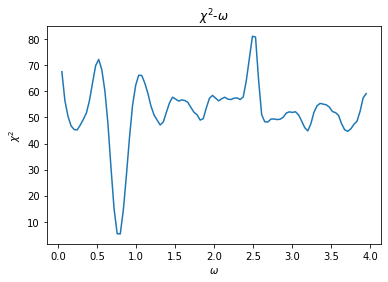

In [73]:
omega_test = np.linspace(0.05,3.95,100)
chisqr_test = np.zeros(len(omega_test))
for i in range(len(omega_test)):
    d_fit_test = oscDecay(t, A, B, C, tau, omega_test[i])
    chisqr_test[i] = chi_square(t, d, d_fit_test, error)
plt.plot(omega_test, chisqr_test)
plt.xlabel('$\omega$')
plt.ylabel('$\chi^2$')
plt.title('$\chi^2$-$\omega$')
plt.show()

<font size = 3 color = black face = "Times New Roman">The best value of $\omega$ is about 0.8, it is corrsponding to our result.

#### **Problem 5**

#### Question 1

In [74]:
def sinesum(t,b): # Coefficients bn in array b and time coordinates in array t.
    def f(x):
        n = np.array(range(1, len(b)+1))
        return (b*np.sin(n*x)).sum() # Define the function with the given bn.
    S_N = []
    for x in t: # Use iteration to get the result for each t.
        S_N.append(f(x))
    return np.array(S_N)

#### Question 2

In [75]:
def plot_compare (b, f, N, M): # Here b is also added to pass the values for bn into this function.
    t  =np.linspace(-np.pi, np.pi, M) # Get M uniformly distributed t coordinates.
    f_value = np.array(f(t))
    S_N_value = sinesum(t, b[:N]) # Take the first N terms in b adn get the value for S_N(t)
    plt.plot(t, f_value, color = 'r')
    plt.plot(t, S_N_value, color = 'b')
    plt.title(r'Plot of $f(t),S_N(t)$ as a function of t')
    plt.xlabel('t')
    plt.ylabel(r'$f(t)/S_N(t)$')
    plt.legend([r'$f(t)$',r'$S_N(t)$'])
    plt.show()

#### Question 3

In [76]:
def error(b, f, M):
    t=np.linspace(-np.pi, np.pi, M) # Get M uniformly distributed t coordinates.
    f_value = np.array(f(t))
    S_N_value = sinesum(t, b) # Take the first N terms in b and get the values for S_N(t)
    error = np.sqrt(((f_value - S_N_value)**2).sum()) # Use the formula to calculate the error E.
    return error

#### Question 4

In [77]:
def trial(f, N, M):
    print('''Please enter a set of values for b (e.g. 1,2,4 means b1 = 1, b2 = 2, b3 = 4), if you have already finshed 
your experiment just print 'finish' to exit.''')
    while True:
        b = input('>')
        if b.lower() == 'finish':
            print('Exit')
            break
        else:
            b = b.split(',')
            a = []
            for i in b:
                a.append(float(i))
            b = a
            plot_compare(b, f, N, M)
            E = error(b, f, M)
            sign = input('Would you like to check your error? ') # Enter 1 if you want check your error.
            if sign == '1':
                print(f'Your error is {E}.')

Please enter a set of values for b (e.g. 1,2,4 means b1 = 1, b2 = 2, b3 = 4), if you have already finshed 
your experiment just print 'finish' to exit.


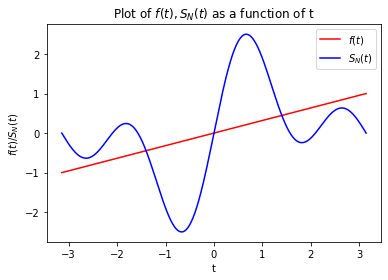

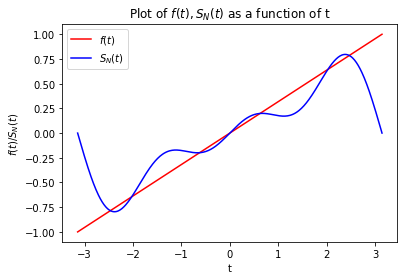

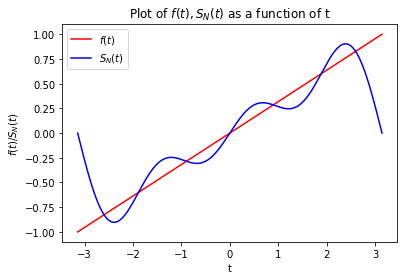

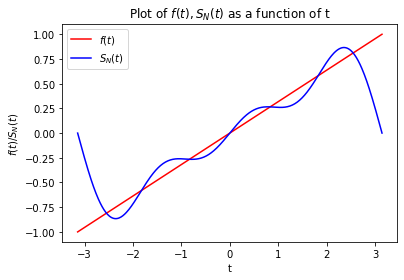

Exit


In [78]:
# Test the function above with M = 500, f(t) = t/pi and N = 3.
M = 500
def f(t):
    return t / np.pi
trial(f, 3, 500)

<font size = 4 color = black face = "Times New Roman">From the above testing, we find that when $ b_1 = 0.6, b_2 = -0.3, b_3= 0.2$, which means $S_N(t) = 0.6sin(t) - 0.3sin(2t) + 0.2sin(3t)$ best approximates $f(t) = \dfrac{1}{\pi}t$ on $[-\pi, \pi]$ with error $E = 5.4921814240561355$

#### Question 5

In [79]:
def get_three_b_values(begin, end, step): 
# Begin and end set the interval, step is the difference between two neighbouring values chosen. (begin < end; step>0)
    b = []
    for b1 in np.arange(begin, end, step):
        for b2 in np.arange(begin, end ,step):
            for b3 in np.arange(begin, end ,step):
                b.append([b1, b2, b3])  
    return b

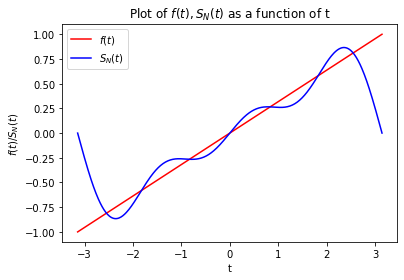

The smallest error is 5.492181424056136
The corresponding b1 = 0.5999999999999996, b2 = -0.30000000000000016, b3 = 0.19999999999999973


In [80]:
# Still use the test elements in the last problem.
M = 500
N = 3
def f(t):
    return t / np.pi
b_sets = get_three_b_values(-1, 1, 0.1) # cover the interval [-1,-1] with step 0.1
E_mini = error(b_sets[0], f, M)
b_best = b_sets[0]
for b in b_sets:
    E = error(b, f, M)
    if E < E_mini:
        E_mini = E
        b_best = b
plot_compare (b_best, f, N, M)
print(f'''The smallest error is {E_mini}
The corresponding b1 = {b_best[0]}, b2 = {b_best[1]}, b3 = {b_best[2]}''')

<font size = 4 color = black face = "Times New Roman"> From this automated process, we also find the best approximation for $f(t) = \dfrac{1}{\pi}t$ on $[-\pi, \pi]$ is $S_N(t) = 0.6sin(t) - 0.3sin(2t) + 0.2sin(3t)$ with corresponding $ b_1 = 0.6, b_2 = -0.3, b_3= 0.2$ and error $E = 5.492181424056136$.(Due to the error in the calculation of the computer, the value for b therefore has some error. Considering the loop for getting the value of them, they should just be 0.6,-0.3,0.2)The result is just the same with the test before.